<a href="https://colab.research.google.com/github/rohith4743/machinelearning/blob/main/power/predictpower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!git clone https://github.com/rohith4743/machinelearning.git
!mv machinelearning/power/data data
!rm -r machinelearning
!pip install -q seaborn

Cloning into 'machinelearning'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [67]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
train_data = pd.read_csv("data/train.csv")
train_data = train_data.dropna()
train_data = pd.get_dummies(train_data, columns=['cloud_level', 'turbine_status'], prefix="", prefix_sep="")

In [64]:
columns = list(train_data.columns)
columns.remove('tracking_id')
columns.remove('datetime')
columns.remove('windmill_generated_power(kW/h)')
columns

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)',
 'Extremely Low',
 'Low',
 'Medium',
 'A',
 'A2',
 'AAA',
 'AB',
 'ABC',
 'AC',
 'B',
 'B2',
 'BA',
 'BB',
 'BBB',
 'BCB',
 'BD',
 'D']

In [65]:
train_dataset = train_data.sample(frac=0.8, random_state=0)
test_dataset = train_data.drop(train_dataset.index)

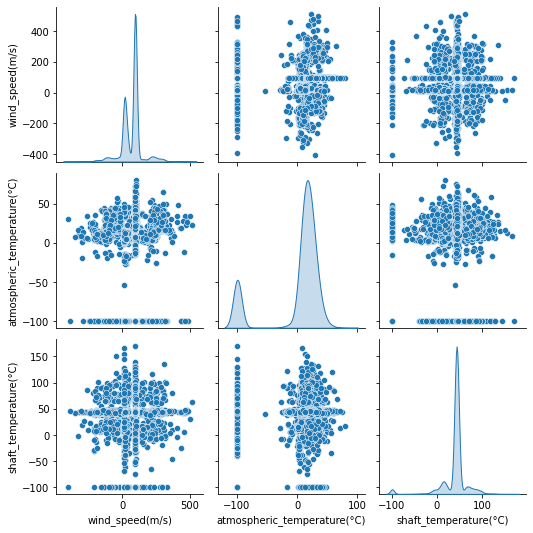

In [76]:
sns.pairplot(train_dataset[columns[:3]], diag_kind="kde")